In [4]:
from scipy.stats import binom
from scipy.stats import expon
from scipy.stats import gamma
from scipy.stats import norm

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Exponential Distributions

**Q1.** Recall that we used the conjugate Gamma prior for $\lambda$, which represents the arrival rate of buses per minute. Suppose our prior belief about this rate is that it has a mean of $\frac{1}{20}$ arrivals per minute and a standard deviation of $\frac{1}{5}$. Given this, the prior follows a $\text{Gamma}(a, b)$ distribution, where $a = \frac{1}{16}$.

Determine the value of $b$

**Q2**  Suppose that we wish to use a prior with the same mean (1/20), but with effective sample size of one arrival. Then the prior for $\lambda$  is $\text{Gamma}(1, 20)$ .

In addition to the original $Y_1​=12$, we observe the waiting times for four additional busses: $𝑌_2=15, Y_3​=8, Y_4​=13.5, Y_5​=25$.


 - What is the mean of the posterior distribution?
 - use python to find the posterior probability that $\lambda <1/10$

In [5]:
def plot_gamma(shape = 2,scale = 2, lam = 1, bounds = [0.025,0.975]):
    x = np.linspace(0, gamma.ppf(0.99, shape, scale = 1/scale), 100)
    plt.plot(x, gamma.pdf(x, shape, scale = 1/scale ), 'r-', lw=5, alpha=0.6)
    cr_int = gamma.ppf(bounds, shape, scale = 1/scale)
    plt.plot([cr_int[0],cr_int[0]], [0.0,gamma.pdf(cr_int[0], shape, scale = 1/scale)], 'b-', lw=3, alpha=0.3)
    plt.plot([cr_int[1],cr_int[1]], [0.0,gamma.pdf(cr_int[1], shape, scale = 1/scale)], 'b-', lw=3, alpha=0.3)
    plt.plot(cr_int, [0.0,0.0], 'b-', lw=3, alpha=0.3)
    plt.margins(0.05)
    plt.legend(('gamma pdf', '95% credible interval'), loc='upper right')
  
    print('Credible intervals at 95% level are:',cr_int)
    print('Probability that lambda less than',gamma.cdf(lam, shape,scale=1/scale) )
    print('Posterior mean:', shape/scale)
    plt.xlabel('x')
    plt.ylabel('gamma pdf')

Credible intervals at 95% level are: [0.00126589 0.18444397]
Probability that lambda less than 0.9999999979388464
Posterior mean: 0.05


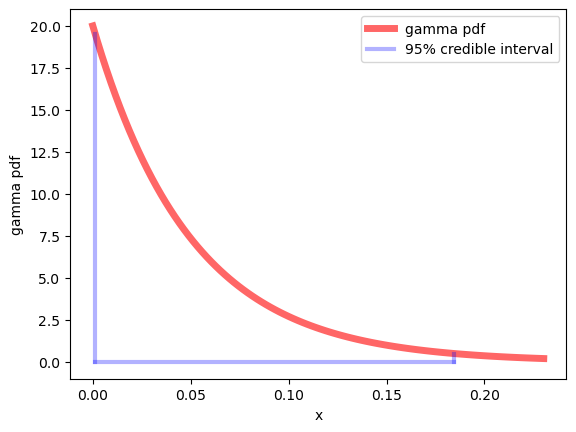

In [8]:
plot_gamma(shape = 1,scale = 20, lam = 1, bounds = [0.025,0.975])

## Earthquake Rate Modeling in California (2015) 

The United States Geological Survey maintains a list of significant earthquakes worldwide. In this analysis, we will model the rate of earthquakes with a magnitude of 4.0 or greater in the state of California during the year 2015. To understand the timing of these earthquakes, we will employ an independent and identically distributed (iid) exponential model on the waiting time between significant earthquakes. This approach is appropriate under the following assumptions: 

    1. Earthquake events are independent. 
    2. The rate at which earthquakes occur does not change during the year. 
    3. The earthquake hazard rate remains constant, meaning that the probability of an earthquake occurring tomorrow is the same regardless of whether the last earthquake was one day ago or 100 days ago.

Let $Y_i$ denote the waiting time in days between the ith earthquake and the following earthquake. Our model is defined as follows: $Y_i \sim \text{iid} \, \text{Exponential}(\lambda)$ In this model, the expected waiting time between earthquakes is represented as: $E(Y) = \frac{1}{\lambda} \, \text{days}$ For our analysis, we will assume a conjugate prior for $\lambda$, which follows a Gamma distribution: $\lambda \sim \text{Gamma}(a, b)$ We will set our prior expectation for $\lambda$ to be $\frac{1}{30}$, and we will utilize a prior effective sample size of one interval between earthquakes. This setting allows us to incorporate prior knowledge into our model effectively.

- What is the value of 𝑎?

- What is the value of 𝑏?

- If the significant earthquakes of magnitude 4.0+ in the state of California during 2015 occurred on the following dates: January 4, January 20, January 28, May 22, July 21, July 25, August 17, September 16, December 30. What will be the data vector?
- What will the posterior distribution be? 
- Use python to calculate the upper end of the 95% equal-tailed credible interval for $\lambda$, the rate of major earthquakes in events per day. 

The posterior predictive density for a new waiting time $y^*$ in days is:

$$
f(y^* \mid y) = \int f(y^* \mid \lambda) \cdot f(\lambda \mid y) d\lambda 
= \frac{\beta^\alpha \Gamma(\alpha+1)}{(\beta + y^*)^{\alpha+1} \Gamma(\alpha)} I\{y^* \geq 0\}
= \frac{\beta^\alpha \alpha}{(\beta + y^*)^{\alpha+1}} I\{y^* \geq 0\}
$$

Plot posterior predictive density for new value

# Normal data


## Normal Distribution with Known Variance
- **Posterior mean**: The posterior mean is a weighted average of the prior mean and the observed data mean. 
  $$ \mu_{\text{posterior}} = \frac{\tau_0^2}{\tau_0^2 + \sigma^2/n} \mu_0 + \frac{\sigma^2/n}{\tau_0^2 + \sigma^2/n} \bar{Y} $$
  where $\bar{Y}$is the sample mean of the data and $n$is the sample size.

- **Posterior variance**: The posterior variance shrinks as more data is observed:
  $$ \tau_{\text{posterior}}^2 = \frac{1}{\frac{1}{\tau_0^2} + \frac{n}{\sigma^2}} $$
  
  
  $$
\mu_{\text{posterior}} = \frac{\frac{n}{\sigma^2} \bar{X} + \frac{1}{\tau_0^2} \mu_0}{\frac{n}{\sigma^2} + \frac{1}{\tau_0^2}}
$$

This can be rewritten as:

$$
\mu_{\text{posterior}} = \frac{n \bar{X} + W \mu_0}{n + W}
$$


## Unknown Mean and Variance


### Prior for $\mu$ and $\sigma^2$
We can specify the prior in two steps:

1. **Prior for $\mu$ given $\sigma^2$**:
   - $\mu$ is normally distributed, conditional on $\sigma^2$, with mean $M$ and variance $\frac{\sigma^2}{W}$.
   - $W$ represents the **effective sample size** of the prior and scales with $\sigma^2$:
     $$ 
     \mu \mid \sigma^2 \sim \mathcal{N}\left(M, \frac{\sigma^2}{W}\right)
     $$

2. **Prior for $\sigma^2$**:
   - The conjugate prior for $\sigma^2$ is an **inverse gamma distribution** [[Inverse_Gamma_Distribution]] with parameters $\alpha$ and $\beta$:
     $$ 
     \sigma^2 \sim \text{Inverse-Gamma}(\alpha, \beta)
     $$

### Posterior Distributions
After observing data $X = (X_1, \dots, X_n)$, we can compute the **posterior distributions** for both $\mu$ and $\sigma^2$ based on these priors.

1. **Posterior for $\sigma^2$ given $X$**:
   - The posterior for $\sigma^2$ follows an **inverse gamma distribution** with updated parameters:
     $$ 
     \sigma^2 \mid X \sim \text{Inverse-Gamma}\left(\alpha + \frac{N}{2}, \beta + \frac{1}{2} \left(\sum_{i=1}^N (X_i - \bar{X})^2 + \frac{N W}{N + W} (\bar{X} - M)^2\right)\right)
     $$

2. **Posterior for $\mu$ given $\sigma^2$**:
   - The posterior for $\mu$, conditional on $\sigma^2$, is normally distributed:
     $$ 
     \mu \mid \sigma^2, X \sim \mathcal{N}\left(\frac{N \bar{X} + W M}{N + W}, \frac{\sigma^2}{N + W}\right)
     $$
   - Here, $\bar{X}$ is the sample mean of the data, and the posterior mean can be written as a **weighted average** of the prior mean $M$ and the data mean $\bar{X}$.

### Marginalizing Over $\sigma^2$
In many cases, we're primarily interested in inference for $\mu$ and may not care about $\sigma^2$. We can **marginalize out** $\sigma^2$, integrating over its posterior distribution. This results in the marginal posterior for $\mu$, which follows a **Student’s T-distribution**.

- **Marginal posterior for $\mu$**:
  $$ 
  \mu \mid X \sim t\left(\text{loc} = \frac{N \bar{X} + W M}{N + W}, \text{scale} = \sqrt{\frac{\beta + \frac{1}{2} \left(\sum_{i=1}^N (X_i - \bar{X})^2 + \frac{N W}{N + W} (\bar{X} - M)^2\right)}{(N + W)(\alpha + \frac{N}{2})}}, \text{df} = 2\alpha + N \right)
  $$

### Posterior Predictive Distribution
The **posterior predictive distribution**, which gives the distribution of future observations based on the data, also follows a **T-distribution**.


## Thermometer calibration:

Suppose you are trying to calibrate a thermometer by testing the temperature it reads when water begins to boil. Because of natural variation, you take n independent measurements (experiments) to estimate $\theta$, the mean temperature reading for this thermometer at the boiling point. Assume a normal likelihood for these data, with mean $\theta$ and known variance $\sigma^2=0.25$  (which corresponds to a standard deviation of 0.5 degrees Celsius).

Suppose your prior for $\theta$ is (conveniently) the conjugate normal. You know that at sea level, water should boil at 100 degrees Celsius, so you set the prior mean at $m_0=100$.

- If you specify a prior variance $s_0^2​$  for $\theta$, write the model for your measurements $Y_i, i=1,\ldots,n$ ?
You decide you want the prior to be equivalent (in effective sample size) to one measurement.

- What value should you select for $s_0^2$​ the prior variance of $\theta$ ? Round your answer to two decimal places.

You collect the following $n=5$ measurements: (94.6, 95.4, 96.2, 94.9, 95.9).

- What is the posterior distribution for $\theta$?

Use python to find the upper end of a 95% equal-tailed credible interval for $\theta$.

After collecting these data, is it reasonable to conclude that the thermometer is biased toward low values?


What is the posterior predictive distribution of a single future observation $𝑌$

## Restaurantes

Your friend moves from city A to city B and is delighted to find her favorite restaurant chain at her new location. After several meals, however, she suspects that the restaurant in city B is less generous. She decides to investigate.

She orders the main dish on 30 randomly selected days throughout the year and records each meal's weight in grams. You still live in city A, so you assist by performing the same experiment at your restaurant. Assume that the dishes are served on identical plates (measurements subtract the plate's weight), and that your scale and your friend’s scale are consistent.

Your friend investigates the three observations above 700 grams and discovers that she had ordered the incorrect meal on those dates. She removes these observations from the data set and proceeds with the analysis using $n = 27$.

She assumes a normal likelihood for the data with unknown mean $\mu$ and unknown variance $\sigma^2$. She uses the model presented in Lesson 10.2 where, conditional on $\sigma^2$, the prior for $\mu$ is normal with mean $m$ and variance $\sigma^2 / w$. Next, the marginal prior for $\sigma^2$ is $\text{Inverse-Gamma}(a, b)$.

Your friend's prior guess on the mean dish weight is 500 grams, so we set $m = 500$. She is not very confident with this guess, so we set the prior effective sample size $w = 0.1$. Finally, she sets $a = 3$ and $b = 200$.


 - Simulate a large number of draws (at least 300) from the prior for $\sigma^2$ and report your approximate prior mean from these draws.
 
 
 With the $n = 27$ data points, your friend calculates the sample mean $\bar{y} = 609.7$ and the sample variance 

$$
s^2 = \frac{1}{n - 1} \sum (y_i - \bar{y})^2 = 401.8
$$

Using the update formulas for normal distribution calculate the posterior distributions for parameters. 

$$
\sigma^2 \mid y \sim \text{Inverse-Gamma}(a', b')
$$

$$
\mu \mid \sigma^2, y \sim N\left(m', \frac{\sigma^2}{w + n}\right)
$$

Perform the posterior simulation and compute your approximate 95% equal-tailed credible interval for $\mu$.


You complete your experiment at Restaurant A with $n = 30$ data points, which appear to be normally distributed. You calculate the sample mean $\bar{y} = 622.8$ and sample variance 

$$
s^2 = \frac{1}{n - 1} \sum (y_i - \bar{y})^2 = 403.1
$$



Treating the data from Restaurant A as independent from Restaurant B, we can now attempt to answer your friend's original question: is Restaurant A more generous? To do so, we can compute posterior probabilities of hypotheses like $\mu_A > \mu_B$. 

This is a simple task if we have simulated draws for $\mu_A$ and $\mu_B$. For $i = 1, \dots, N$ (the number of simulations drawn for each parameter), make the comparison $\mu_A > \mu_B$ using the $i$-th draw for $\mu_A$ and $\mu_B$. Then, count how many of these return a TRUE value and divide by $N$, the total number of simulations.

## Priors

**Q1** Suppose we flip a coin five times to estimate $\theta$, the probability of obtaining heads. We use a Bernoulli likelihood for the data and a non-informative (and improper) Beta(0,0) prior for $\theta$. We observe the following sequence: (H, H, H, T, H). Because we observed at least one H and at least one T, the posterior is proper. What is the posterior distribution for $\theta$?





**Q2** Continuing the previous question, what is the posterior mean for $\theta$? Round your answer to one decimal place.



**Q3** Consider again the thermometer calibration problem .
Assume a normal likelihood with unknown mean $\theta$  and known variance $\sigma^2=0.25$. Now use the non-informative (and improper) flat prior for $\theta$ across all real numbers. This is equivalent to a conjugate normal prior with variance equal to $\infty$.

- You collect the following  n=5 measurements: (94.6, 95.4, 96.2, 94.9, 95.9). What is the posterior distribution for $\theta$?






**Q4**

Scientist A studies the probability of a certain outcome of an experiment and calls it $theta$. To be non-informative, he assumes a $\text{Uniform}(0,1)$ prior for $\theta$.

Scientist B studies the same outcome of the same experiment using the same data, but wishes to model the odds 

$$
\phi = \frac{\theta}{1 - \theta}
$$

Scientist B places a uniform distribution on $\phi$. If she reports her inferences in terms of the probability $\theta$, will they be equivalent to the inferences made by Scientist A?

